In [1]:
import numpy as np
from PIL import Image
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle
import os

In [2]:
file_path = 'D:/PRML Project pkl/rf_aug_best.pkl'
with open(file_path, 'rb') as file:
    rf = pickle.load(file)

<h3><b>The following code blocks take in a real world handwriting of a digit, preprocess it and gives the prediction after loading the Random Forest classifier</b></h3>

In [56]:
def preprocess_image(img_arr, show_images = True):
    img_crop = img_arr[40:410, 40:410]
    img_resize = resize(img_crop, (28, 28, 3), anti_aliasing=True)

    #rgb to grayscale
    gray_img = np.dot(img_resize[..., :3], [0.2989, 0.5870, 0.1140])

    #calculate negative of an image
    max_intensity = np.max(gray_img)
    negative = max_intensity - gray_img

    #min-max scaling to 0 and 255
    img_min = np.min(negative)
    img_max = np.max(negative)

    min_max_img = (negative - img_min) * 255. / (img_max - img_min)

    #custom transformation with slight changes as this is real image
    new_x = np.empty(min_max_img.shape, dtype=(np.float32))
    temp = np.copy(min_max_img).astype(np.float32)
    temp[temp <= 100] = 0
    temp[(temp > 100) & (temp < 200)] = 0.75
    temp[temp >= 200] = 1
    new_x = temp.astype(np.float32)

    if show_images:
        images = [img_arr, img_crop, img_resize, gray_img, negative, min_max_img]

        fig = plt.figure(figsize=(10, 6))

        for i in range(6):
            ax = fig.add_subplot(2, 3, i+1) 
            if i > 2: 
                ax.imshow(images[i], cmap='gray')
            else:
                ax.imshow(images[i])
                
            ax.axis('off')

        plt.tight_layout()

    return new_x


def disp_processed_img(img):
    arr = img
    indices_point75 = np.argwhere(arr == 0.75)
    indices_1 = np.argwhere(arr == 1)

    x_grid, y_grid = np.meshgrid(np.arange(arr.shape[1]), np.arange(arr.shape[0]))

    plt.figure(figsize=(5, 5))
    plt.scatter(x_grid, y_grid, c='white', marker='s', alpha=0)
    plt.scatter(indices_point75[:, 1], 28 - indices_point75[:, 0], marker='o', alpha=0.75)
    plt.scatter(indices_1[:, 1], 28 - indices_1[:, 0], marker='o', alpha=1)
    plt.xlim(-0.5, arr.shape[1] - 0.5)
    plt.ylim(-0.5, arr.shape[0] - 0.5)
    plt.xticks([])
    plt.yticks([])

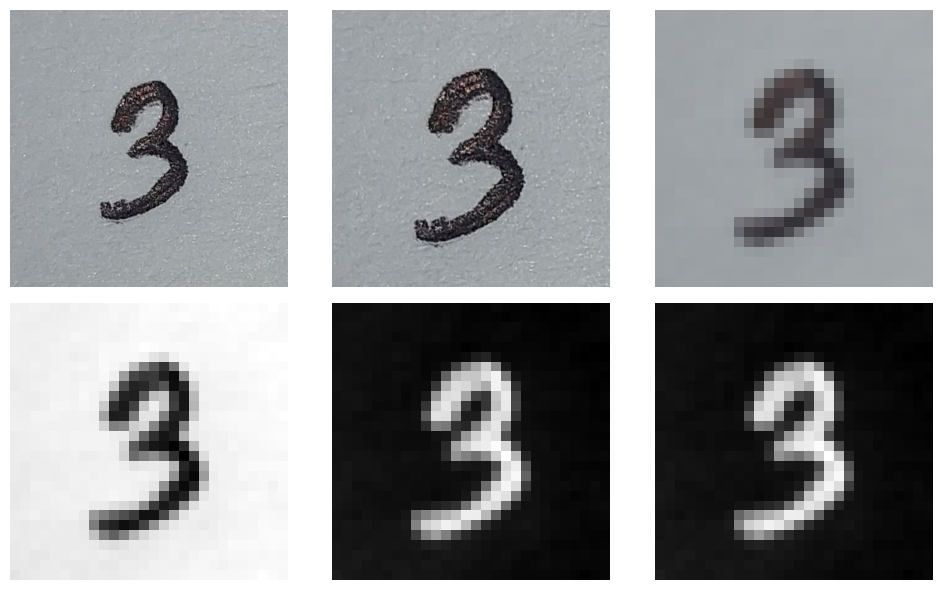

In [59]:
img_3 = Image.open('3.jpg')
img_3_arr = np.array(img_3)
transformed_3 = preprocess_image(img_3_arr, show_images=True)
plt.savefig('Images/my_3.png')
plt.show()

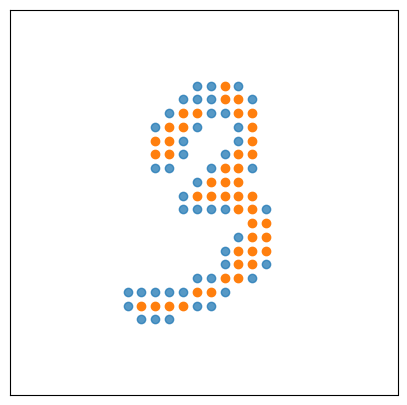

In [61]:
disp_processed_img(transformed_3)
plt.savefig('Images/my_3_transformed.png')
plt.show()

In [50]:
print(rf.predict_proba(transformed_3.reshape(1, -1))[0])

[0.01666667 0.05666667 0.04       0.32       0.03666667 0.20666667
 0.01333333 0.08       0.07666667 0.15333333]


In [51]:
print(rf.predict(transformed_3.reshape(1, -1))[0])

3


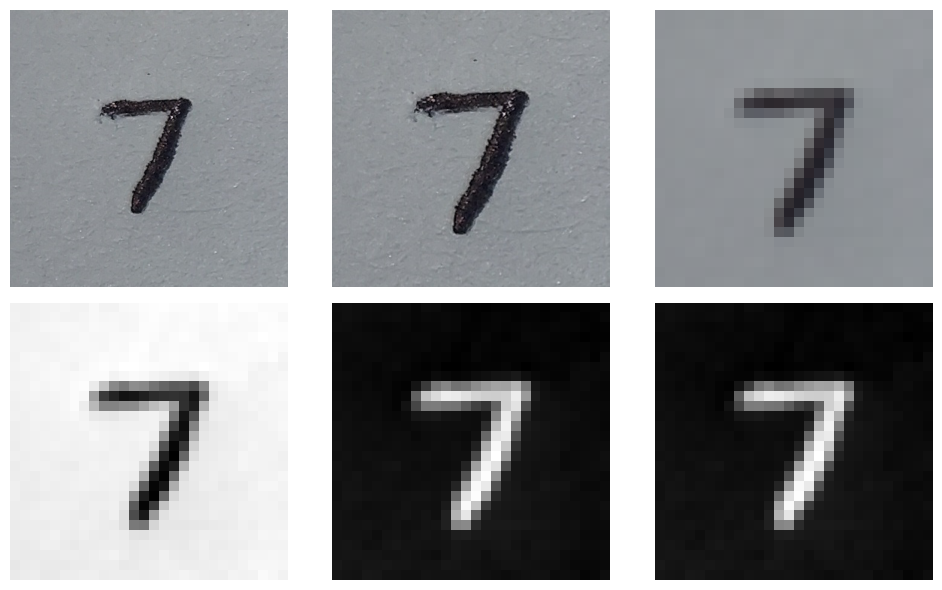

In [60]:
img_7_arr = np.array(Image.open('7.jpg'))
transformed_7 = preprocess_image(img_7_arr)
plt.savefig('Images/my_7.png')
plt.show()

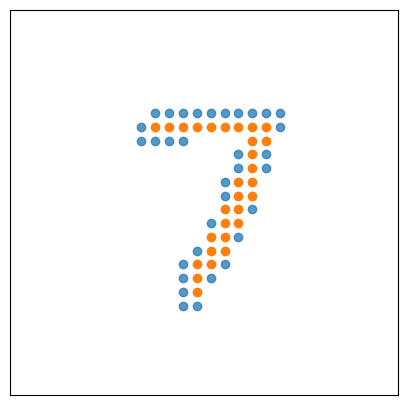

In [62]:
disp_processed_img(transformed_7)
plt.savefig('Images/my_7_transformed.png')
plt.show()

In [54]:
print(rf.predict_proba(transformed_7.reshape(1, -1))[0])

[0.         0.01333333 0.01       0.02666667 0.00666667 0.
 0.         0.93333333 0.         0.01      ]


In [55]:
print(rf.predict(transformed_7.reshape(1, -1))[0])

7
